<a href="https://colab.research.google.com/github/helloyaz/weatherwise_Yasmine_Kyaw_19473235/blob/main/weatherwise_Yasmine_Kyaw_19473235_starter_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌦️ WeatherWise – Starter Notebook

Welcome to your **WeatherWise** project notebook! This scaffold is designed to help you build your weather advisor app using Python, visualisations, and AI-enhanced development.

---

📄 **Full Assignment Specification**  
See [`ASSIGNMENT.md`](ASSIGNMENT.md) or check the LMS for full details.

📝 **Quick Refresher**  
A one-page summary is available in [`resources/assignment-summary.md`](resources/assignment-summary.md).

---

🧠 **This Notebook Structure is Optional**  
You’re encouraged to reorganise, rename sections, or remove scaffold cells if you prefer — as long as your final version meets the requirements.

✅ You may delete this note before submission.



## 🧰 Setup and Imports

This section imports commonly used packages and installs any additional tools used in the project.

- You may not need all of these unless you're using specific features (e.g. visualisations, advanced prompting).
- The notebook assumes the following packages are **pre-installed** in the provided environment or installable via pip:
  - `requests`, `matplotlib`, `pyinputplus`
  - `fetch-my-weather` (for accessing weather data easily)
  - `hands-on-ai` (for AI logging, comparisons, or prompting tools)

If you're running this notebook in **Google Colab**, uncomment the following lines to install the required packages.


In [8]:
import os

os.environ['HANDS_ON_AI_SERVER'] = 'http://ollama.serveur.au'
os.environ['HANDS_ON_AI_MODEL'] = 'granite3.2'
os.environ['HANDS_ON_AI_API_KEY'] = input('Enter your API key: ')

Enter your API key: 


## 📦 Setup and Configuration
Import required packages and setup environment.

In [14]:
!pip install fetch-my-weather pyinputplus requests matplotlib hands-on-ai
!pip install ipywidgets



  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 64.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.9/69.9 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [15]:
import requests
import matplotlib.pyplot as plt
import pyinputplus as pyip

from fetch_my_weather import get_weather
from hands_on_ai.chat import get_response



## 🌤️ Weather Data Functions

In [24]:
# Always use `weather_data` as the main variable to hold results from get_weather_data()
import requests  # Ensure this is imported in your notebook

def get_weather_data(city="Perth", forecast_days=3):
    if forecast_days > 3:
        print("⚠️ Sorry! Only up to 3 days of forecast can be provided.")
        forecast_days = 3

    try:
        url = f"https://wttr.in/{city}?format=j1"
        response = requests.get(url)
        response.raise_for_status()  # Raise error if response code is not 200
        data = response.json()

        # Extract current weather info
        current = data.get("current_condition", [{}])[0]
        weather_now = {
            "temp_C": current.get("temp_C", "N/A"),
            "condition": current.get("weatherDesc", [{}])[0].get("value", "Unknown")
        }

        print(f"\n📍 Weather for {city}")
        print(f"🌡️ Current Temperature: {weather_now['temp_C']}°C")
        print(f"⛅ Condition: {weather_now['condition']}")

        # Extract forecast
        forecast_data = []
        weather_days = data.get("weather", [])[:forecast_days]

        if weather_days:
            print("\n📅 Temperature Forecast:")
            for day in weather_days:
                condition = day.get("hourly", [{}])[4].get("weatherDesc", [{}])[0].get("value", "Unknown")
                readable_condition = convert_condition_to_message(condition)

                forecast = {
                    "date": day.get("date", "Unknown"),
                    "min_temp_C": day.get("mintempC", "N/A"),
                    "max_temp_C": day.get("maxtempC", "N/A"),
                    "condition": condition
                }
                forecast_data.append(forecast)

                print(f"  • {forecast['date']}: {forecast['min_temp_C']}°C – {forecast['max_temp_C']}°C, {readable_condition}")
        else:
            print("⚠️ No forecast data available.")

        return {
            "city": city,
            "current": weather_now,
            "forecast": forecast_data
        }

    except requests.exceptions.RequestException as req_err:
        print(f"\n❌ Network or request error: {req_err}")
        return {"error": str(req_err)}

    except ValueError as val_err:
        print(f"\n❌ Data processing error: {val_err}")
        return {"error": str(val_err)}

    except Exception as e:
        print(f"\n❌ Unexpected error: {e}")
        return {"error": str(e)}


def convert_condition_to_message(condition):
    """Converts a raw weather condition into a descriptive message."""
    condition = condition.lower()
    if "rain" in condition:
        return f"{condition} 🌧️ – Rain expected"
    elif "cloud" in condition:
        return f"{condition} ☁️ – Cloudy skies"
    elif "sun" in condition or "clear" in condition:
        return f"{condition} ☀️ – Clear weather"
    elif "thunder" in condition:
        return f"{condition} ⚡ – Thunderstorms possible"



In [25]:
# Get weather data for a chosen city and number of forecast days (max 3)
weather_data = get_weather_data("Perth", 3)



📍 Weather for Perth
🌡️ Current Temperature: 19°C
⛅ Condition: Sunny

📅 Temperature Forecast:
  • 2025-05-27: 11°C – 21°C, sunny ☀️ – Clear weather
  • 2025-05-28: 14°C – 23°C, sunny ☀️ – Clear weather
  • 2025-05-29: 16°C – 21°C, partly cloudy  ☁️ – Cloudy skies


## 📊 Visualisation Functions

In [26]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

def create_temperature_visualisation(weather_data, output_type='display'):
    """
    Visualize the temperature forecast using a bar chart.

    Args:
        weather_data (dict): Processed weather data containing forecast.
        output_type (str): 'display' to show plot in notebook or 'figure' to return the figure.

    Returns:
        matplotlib.figure.Figure: The figure object if output_type is 'figure'; otherwise, displays the chart.
    """
    try:
        forecast = weather_data.get("forecast", [])
        if not forecast:
            print("⚠️ No forecast data available to visualize.")
            return

        dates = [day.get("date", "Unknown") for day in forecast]
        min_temps = [int(day.get("min_temp_C", 0)) for day in forecast]
        max_temps = [int(day.get("max_temp_C", 0)) for day in forecast]

        fig, ax = plt.subplots(figsize=(8, 5))
        ax.bar(dates, min_temps, label='Min Temp (°C)', color='skyblue')
        ax.bar(dates, max_temps, label='Max Temp (°C)', color='orange', alpha=0.7)

        ax.set_title(f"Temperature Forecast for {weather_data.get('city', 'Unknown')}")
        ax.set_xlabel("Date")
        ax.set_ylabel("Temperature (°C)")
        ax.legend()
        ax.grid(True)

        if output_type == 'figure':
            return fig
        else:
            plt.tight_layout()
            plt.show()

    except Exception as e:
        print(f"❌ Error in temperature visualization: {e}")




📍 Weather for Adelaide
🌡️ Current Temperature: 14°C
⛅ Condition: Light rain shower

📅 Temperature Forecast:
  • 2025-05-27: 11°C – 15°C, partly cloudy  ☁️ – Cloudy skies
  • 2025-05-28: 10°C – 16°C, partly cloudy  ☁️ – Cloudy skies
  • 2025-05-29: 11°C – 17°C, sunny ☀️ – Clear weather


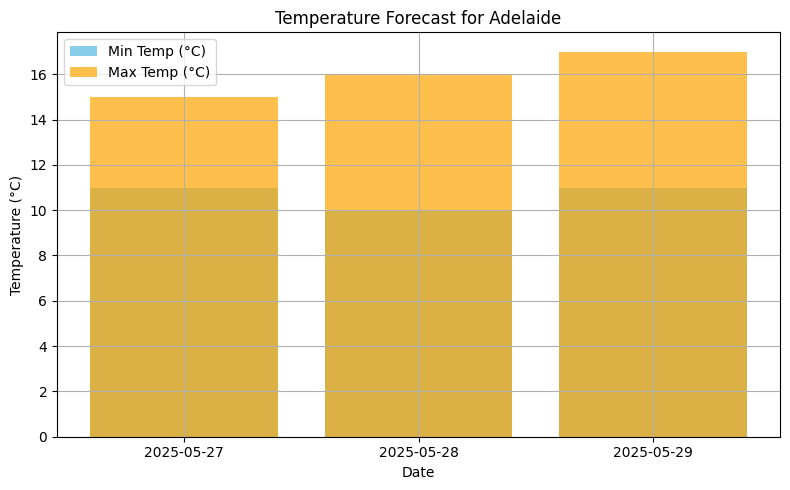

In [27]:
# ✅ Use this consistently throughout your notebook
weather_data = get_weather_data("Adelaide", 3)


# Visualize temperature forecast
create_temperature_visualisation(weather_data)


In [28]:
import matplotlib.pyplot as plt

def create_precipitation_summary_chart(weather_data):
    """
    Create a horizontal summary chart of precipitation expectations based on textual weather conditions.

    Args:
        weather_data (dict): Processed weather data containing forecast.

    Returns:
        None. Displays a horizontal bar chart.
    """
    try:
        forecast = weather_data.get("forecast", [])
        if not forecast:
            print("⚠️ Forecast data is missing or invalid.")
            return

        dates = [day.get("date", "Unknown") for day in forecast]
        descriptions = [day.get("condition", "Unknown").lower() for day in forecast]

        category = []
        color_map = {
            "rain": "#3498db",
            "cloud": "#95a5a6",
            "clear": "#f1c40f",
            "snow": "#a29bfe",
            "other": "#dfe6e9"
        }
        bar_colors = []

        for cond in descriptions:
            if any(w in cond for w in ["rain", "shower", "drizzle", "thunderstorm"]):
                category.append("Rain")
                bar_colors.append(color_map["rain"])
            elif "snow" in cond:
                category.append("Snow")
                bar_colors.append(color_map["snow"])
            elif "cloud" in cond or "overcast" in cond:
                category.append("Cloudy")
                bar_colors.append(color_map["cloud"])
            elif "sun" in cond or "clear" in cond:
                category.append("Clear")
                bar_colors.append(color_map["clear"])
            else:
                category.append("Other")
                bar_colors.append(color_map["other"])

        fig, ax = plt.subplots(figsize=(8, 4))
        ax.barh(dates, [1] * len(category), color=bar_colors)

        for i, cat in enumerate(category):
            ax.text(0.5, i, cat, va='center', ha='center', color='black', fontweight='bold')

        ax.set_title("Precipitation Forecast Summary")
        ax.set_xlabel("Weather Category (Not to Scale)")
        ax.set_xlim(0, 1)
        ax.set_yticks(range(len(dates)))
        ax.set_yticklabels(dates)
        ax.get_xaxis().set_visible(False)

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"❌ Error in precipitation visualization: {e}")



📍 Weather for Perth
🌡️ Current Temperature: 19°C
⛅ Condition: Sunny

📅 Temperature Forecast:
  • 2025-05-27: 11°C – 21°C, sunny ☀️ – Clear weather
  • 2025-05-28: 14°C – 23°C, sunny ☀️ – Clear weather
  • 2025-05-29: 16°C – 21°C, partly cloudy  ☁️ – Cloudy skies


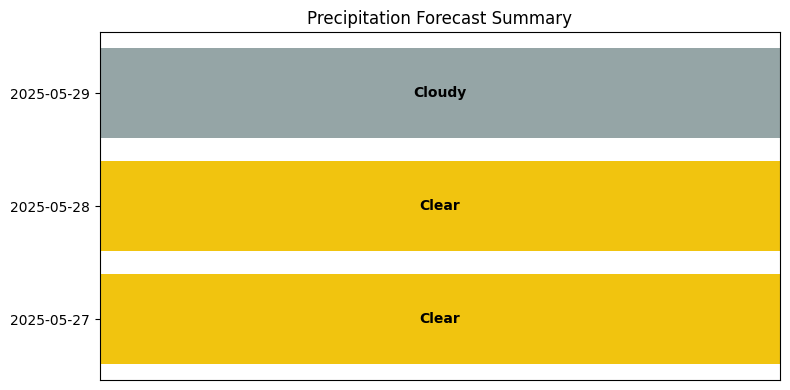

In [29]:
# ✅ Use this consistently throughout your notebook
weather_data = get_weather_data("Perth", 3)

# Visualize precipitation-style summary
create_precipitation_summary_chart(weather_data)


## 🤖 Natural Language Processing

In [57]:
# Define parse_weather_question()
import re
from datetime import datetime

def parse_weather_question(question):
    """
    Parse a user's natural language weather question into structured components.

    Args:
        question (str): The user's weather question.

    Returns:
        dict: Parsed components including city, days, attribute, or an error message.
    """
    question = question.lower()

    # Step 1: Detect attribute
    attributes = ["rain", "snow", "cloud", "sun", "clear", "temperature", "hot", "cold"]
    found_attr = next((attr for attr in attributes if attr in question), "general")

    # Step 2: Determine number of forecast days
    days = 1  # default
    weekdays = ["monday", "tuesday", "wednesday", "thursday", "friday", "saturday", "sunday"]

    if "today" in question:
        days = 1
    elif "tomorrow" in question:
        days = 2
    elif "week" in question:
        days = 3
    else:
        for i, day in enumerate(weekdays):
            if day in question:
                today_idx = datetime.today().weekday()
                target_idx = i
                delta_days = (target_idx - today_idx) % 7
                days = delta_days + 1
                break

    # Step 3: Check forecast range limit
    if days > 3:
        return {
            "status": "error",
            "error": "❌ Sorry, only 3-day forecasts are available. Please choose today, tomorrow, or this week."
        }

    # Step 4: Extract city name
    city_match = re.search(r"in ([a-zA-Z\s]+)", question)
    if city_match:
        city = city_match.group(1).strip()
        # Clean up trailing words like 'this Wednesday'
    for keyword in ["today", "tomorrow", "this week", "this weekend"] + weekdays:
        city = city.replace(keyword, "").strip()
    else:
        return {
            "status": "error",
            "error": "⚠️ Please include a location in your weather question (e.g. 'in Brisbane')."
        }

    # Return structured data
    return {
        "status": "ok",
        "city": city.title(),
        "attribute": found_attr,
        "days": days
    }


In [61]:
# Generate_weather_response() here

def generate_weather_response(parsed_question, weather_data):
    """
    Generate a natural language response to a parsed weather question.

    Args:
        parsed_question (dict): Output from parse_weather_question()
        weather_data (dict): Weather data from get_weather_data()

    Returns:
        str: Formatted natural language weather response.
    """
    if not weather_data or "forecast" not in weather_data:
        return "⚠️ Sorry, I couldn't retrieve valid weather data."

    response = []
    city = parsed_question["city"]
    attr = parsed_question["attribute"]
    forecast = weather_data["forecast"]

    current = weather_data.get("current_condition", {})
    print(f"📍 Weather for {city}")

    # Only show current if data is available
    if current and current.get("temp_C") and current.get("condition"):
      print(f"🌡️ Current Temperature: {current['temp_C']}°C")
      print(f"⛅ Condition: {current['condition'].capitalize()}\n")
    else:
      print("🔎 Current conditions are unavailable.\n")

    if attribute in ["rain", "snow", "cloud", "clear", "sun"]:
      for day in forecast[:days]:
        condition = day.get("condition", "").lower()
        emoji = "🌧️" if "rain" in condition else "❄️" if "snow" in condition else "☁️" if "cloud" in condition else "☀️"
        print(f"📅 {day['date']}: {condition} – {emoji} ", end='')
        if attribute in condition:
            print("Yes ✅")
        else:
            print("No ❌")
    elif attribute in ["temperature", "hot", "cold", "general"]:
      print("\n📅 Temperature Forecast:")
      for day in forecast[:days]:
        print(f"  • {day['date']}: {day['min_temp_C']}°C – {day['max_temp_C']}°C, {day['condition']} ", end='')
        if "rain" in day["condition"].lower():
            print("– 🌧️ Rain expected – take an umbrella!")
        elif "sun" in day["condition"].lower():
            print("– ☀️ Clear skies – enjoy the sunshine!")
        elif "cloud" in day["condition"].lower():
            print("– ☁️ Cloudy skies")
        else:
            print("")

    response.append("\n📅 Temperature Forecast:")

    for day in forecast:
        date = day["date"]
        min_temp = day["min_temp_C"]
        max_temp = day["max_temp_C"]
        condition = day["condition"].lower()

        if attr in condition or attr == "general":
            if "rain" in condition:
                msg = "🌧️ Rain expected – take an umbrella!"
            elif "snow" in condition:
                msg = "❄️ Snow forecasted – bundle up!"
            elif "cloud" in condition:
                msg = "☁️ Mostly cloudy skies."
            elif "clear" in condition or "sun" in condition:
                msg = "☀️ Clear skies expected."
            else:
                msg = "🔍 General forecast info."

            response.append(f"  • {date}: {min_temp}°C – {max_temp}°C, {condition} – {msg}")

    return "\n".join(response)


In [50]:
user_question = "Will it rain in Perth this Wednesday?"

parsed = parse_weather_question(user_question)

if parsed.get("status") == "error":
    print(parsed["error"])
else:
    weather_data = get_weather_data(parsed["city"], parsed["days"])
    print(generate_weather_response(parsed, weather_data))



📍 Weather for In Perth
🌡️ Current Temperature: 16°C
⛅ Condition: Partly cloudy

📅 Temperature Forecast:
  • 2025-05-27: 13°C – 21°C, partly cloudy  ☁️ – Cloudy skies
  • 2025-05-28: 12°C – 17°C, light rain 🌧️ – Rain expected
📍 Weather for In Perth
🌡️ Current Temperature: N/A°C
⛅ Condition: Unknown

📅 Temperature Forecast:
  • 2025-05-28: 12°C – 17°C, light rain – 🌧️ Rain expected – take an umbrella!


## 🧭 User Interface

In [38]:
# Define menu functions using pyinputplus or ipywidgets here

## 🧩 Main Application Logic

In [39]:
# Tie everything together here
def generate_weather_response(parsed_question, weather_data):
    """
    Generate a natural language response to a weather question.

    Args:
        parsed_question (dict): Parsed question data
        weather_data (dict): Weather data

    Returns:
        str: Natural language response
    """
    pass

## 🧪 Testing and Examples

In [40]:
# Include sample input/output for each function

## 🗂️ AI Prompting Log (Optional)
Add markdown cells here summarising prompts used or link to AI conversations in the `ai-conversations/` folder.